In [9]:
from pyFADO import FADO

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
fado  = FADO("spec_wcs1d_p17q10_new_der.fits.output3_EL.fits",
             "spec_wcs1d_p17q10_new_der.fits.output3_ST.fits",
             "spec_wcs1d_p17q10_new_der.fits.output3_1D.fits",
             "spec_wcs1d_p17q10_new_der.fits.output3_DE.fits")


In [7]:
# print EL names, forbidden lines are named with their wavelengths to avoid confution
EL = fado.ELnames()
for el in EL:
    print(el)

[NeV]3425
[OII]3727
[OII]3729
H12
H11
H10
H9
[NeIII]3869
H8HeI
[NeIII]3967
Hepsilon
HeI
[SII]4068
[SII]4076
Hdelta
Hgamma
[OIII]4363
[FeIII]4658
HeII
[ArIV]4711
[ArIV]4740
Hbeta
[OIII]4958
[FeVII]4988
[OIII]5006
[FeVII]5158
[NI]5199
[FeIII]5270
[ClIII]5519
[NII]5754
[FeVII]6086
[OI]6300
[SIII]6312
[OI]6363
[NII]6548
Halpha
[NII]6583
[SII]6716
[SII]6730
[ArIII]7135
[OII]7319
[OII]7330
[ArIII]7751
[FeII]8617


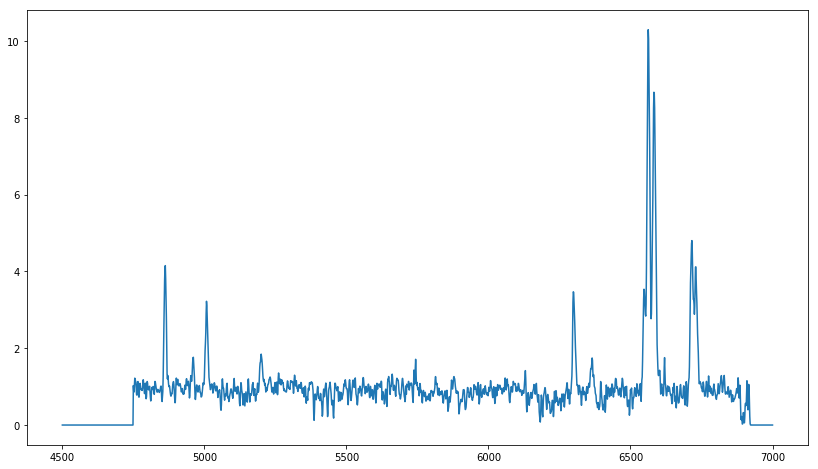

In [11]:
# plot the observed spectra
plt.figure(figsize=(14,8))
fado.plot_obs_spectrum(wmin=4500,wmax=7000)

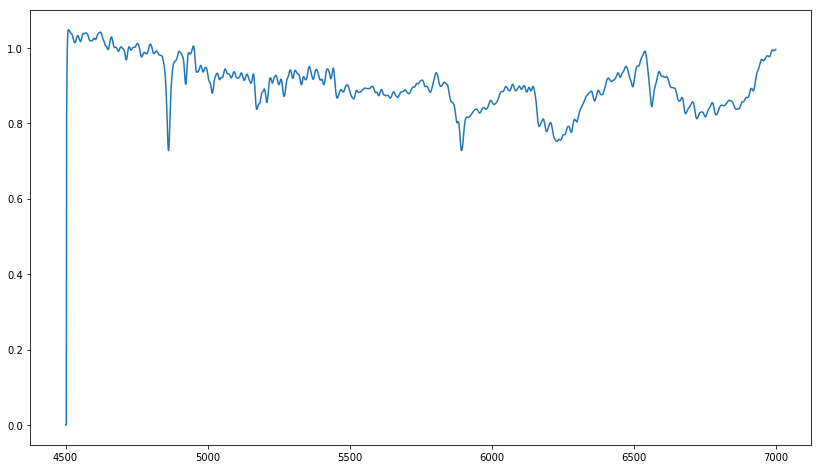

In [12]:
plt.figure(figsize=(14,8))
fado.plot_model_spectrum(wmin=4500,wmax=7000)

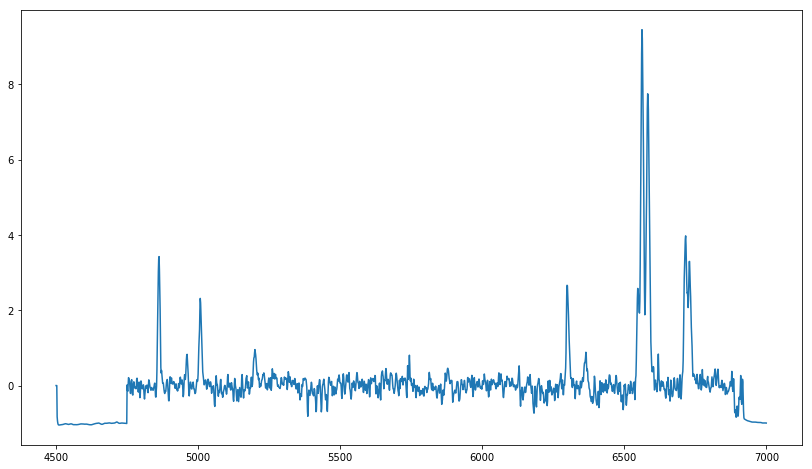

In [13]:
plt.figure(figsize=(14,8))
fado.plot_residual(wmin=4500,wmax=7000)

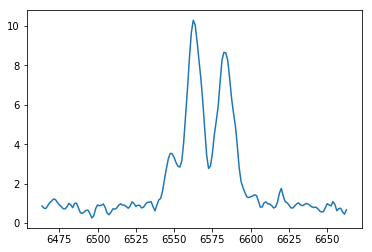

In [15]:
# plot a line
fado.plot_line("Halpha", window=200)

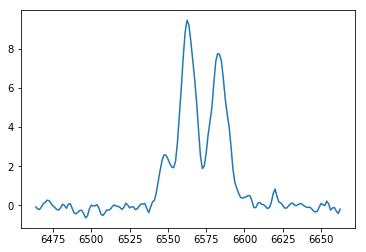

In [16]:
# plot a line with the continuum subtracted
fado.plot_line_residual("Halpha", window=200)

In [17]:
# get results from the fit to a line
fado.get_results("Halpha")

{'Lambda': 6562.515,
 'Amplitude': 9.414136,
 'Sigma': 4.6416216,
 'Vel': 41.993923,
 'shift': -0.0019711938,
 'Flux': 109.53178,
 'EW': 129.30693}

In [18]:
# and errors
fado.get_errors("Halpha")

{'Lambda': 1.2324363,
 'Amplitude': 0.00614505,
 'Sigma': 0.005200365,
 'Vel': 56.385445,
 'shift': 0.0041004512,
 'Flux': 13.312589,
 'EW': 17.484024}

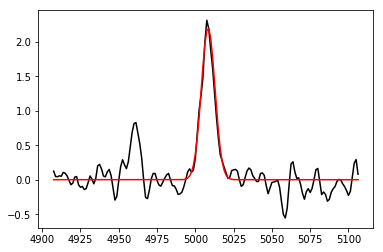

In [21]:
# plot a line with the fit
fado.plot_line_residual("[OIII]5006", window=200, color="k")
fado.plot_fit_to_line("[OIII]5006", window=200, color="r")

['S',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8',
 'f8']